In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flats999.csv')
df.head()

,Cena,Wielkość (m2),Liczba pokoi,Lokalizacja,Do wynajęcia przez,Rodzaj nieruchomości
0,2500.0,49.0,3.0,Białołęka,Agencja,Mieszkanie
1,2500.0,57.0,3.0,Żoliborz,Agencja,Mieszkanie
2,2999.0,57.0,3.0,Mokotów,Właściciel,Mieszkanie
3,2200.0,110.0,4.0,Wawer,Agencja,Mieszkanie
4,2500.0,40.0,2.0,Wilanów,Agencja,Mieszkanie


In [3]:
print(df.shape)
print(df.dtypes)

(999, 6)
Cena                    float64
Wielkość (m2)           float64
Liczba pokoi            float64
Lokalizacja              object
Do wynajęcia przez       object
Rodzaj nieruchomości     object
dtype: object


965


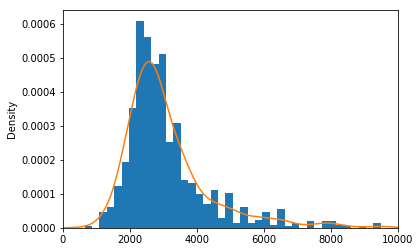

In [4]:
#I dropped rows having NaN value in 'Cena' or 'Wielkość (m2)' column from df
df = df.dropna(subset = ['Cena', 'Wielkość (m2)'])

#and removed outliers:
df = df[abs(df['Wielkość (m2)'] - df['Wielkość (m2)'].mean()) < df['Wielkość (m2)'].std()*3]
df = df[abs(df.Cena - df.Cena.mean()) < df.Cena.std()/5]

df.Cena.plot.hist(bins = 40, density = True, xlim = (0, 10000))
df.Cena.plot.density()

print(df.shape[0])

965


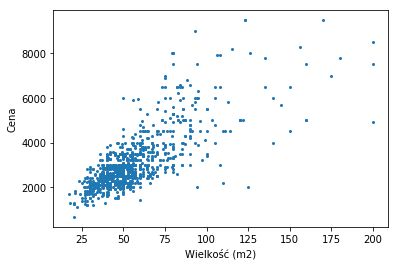

In [5]:
df.plot.scatter(x='Wielkość (m2)', y='Cena', s = 4)
print(df.shape[0])
plt.show()

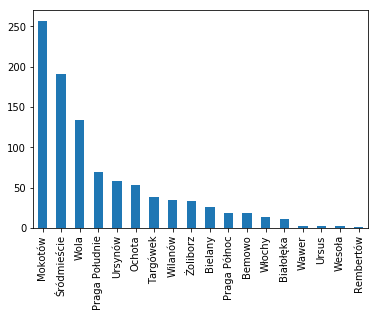

In [6]:
#plot showing how many flats and houses are available for rent in different districts of Warsaw
district = df.dropna(subset = ['Lokalizacja'])
district.Lokalizacja.value_counts().plot.bar()
plt.show()

In [7]:
district.groupby('Lokalizacja', as_index = False)['Cena'].mean().sort_values('Cena', ascending = False)

,Lokalizacja,Cena
12,Wesoła,4250.000000
13,Wilanów,3748.571429
16,Śródmieście,3736.643979
9,Ursus,3400.000000
11,Wawer,3266.666667
3,Mokotów,3232.089494
7,Rembertów,3200.000000
14,Wola,3016.880597
4,Ochota,2850.566038
17,Żoliborz,2816.176471


In [8]:
west_side = ['Śródmieście', 'Wola', 'Ochota', 'Żoliborz','Bielany', 'Bemowo', 
             'Ursus', 'Włochy','Wilanów', 'Ursynów', 'Mokotów']
east_side = ['Praga południe', 'Praga północ', 'Targówek','Wawer', 'Wesoła', 'Rembertów','Białołęka']

west = district[district.Lokalizacja.isin(west_side)].shape[0]
east = district.shape[0] - west
print('count\nwest: ', west, '\neast: ', east)
#how many flats are available on each side of Vistula river?

count
west:  822 
east:  143


In [9]:
west_mean = district[district.Lokalizacja.isin(west_side)].Cena.mean()
east_mean = district[district.Lokalizacja.isin(east_side)].Cena.mean()
print('mean price\nwest: ', west_mean, '\neast: ', east_mean)
#what is the mean price of rental on each side?

mean price
west:  3196.169099756691 
east:  2608.909090909091


In [10]:
print(df.groupby('Liczba pokoi').size())
print('---------------')
print(df.groupby('Rodzaj nieruchomości').size())
print('---------------')
print(df.groupby('Do wynajęcia przez').size())

Liczba pokoi
1.0    112
2.0    576
3.0    224
4.0     38
5.0      9
6.0      4
dtype: int64
---------------
Rodzaj nieruchomości
Dom            10
Mieszkanie    952
dtype: int64
---------------
Do wynajęcia przez
Agencja       859
Właściciel     96
dtype: int64
